# Titanic Data Set 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot 
import seaborn as sens




# Read the dataset

In [2]:
titanic_df = pd.read_csv("titanic_train.csv")

# Check the data

In [3]:
titanic_df.head(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Type of data

In [4]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


# Missing data

In [5]:
titanic_df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

# Remove Heading

In [6]:
titanic_df.drop(['name'],  axis=1,inplace=True) 
titanic_df.drop(['cabin'],  axis=1,inplace=True) 
titanic_df.drop(['ticket'],  axis=1,inplace=True) 
titanic_df.drop(['home.dest'],  axis=1,inplace=True) 
titanic_df.drop(['boat'],  axis=1,inplace=True) 
titanic_df.drop(['body'],  axis=1,inplace=True) 


# Dummy numbers to replace strings  

In [7]:
titanic_df['sex']

0      female
1        male
2      female
3      female
4        male
        ...  
845      male
846      male
847    female
848    female
849      male
Name: sex, Length: 850, dtype: object

In [8]:
df1=pd.get_dummies(titanic_df,columns=['sex','embarked'])
df1

,passenger_id,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1216,3,NaN,0,0,7.7333,1,1,0,0,1,0
1,699,3,38.0,0,0,8.6625,0,0,1,0,0,1
2,1267,3,30.0,1,1,24.1500,0,1,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,1,0,0,0,1
4,576,2,40.0,0,0,13.0000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,50.0000,0,0,1,0,0,1
846,174,1,58.0,0,0,29.7000,0,0,1,1,0,0
847,467,2,24.0,1,0,26.0000,1,1,0,0,0,1
848,1112,3,3.0,1,1,13.7750,0,1,0,0,0,1


# Plotting graph

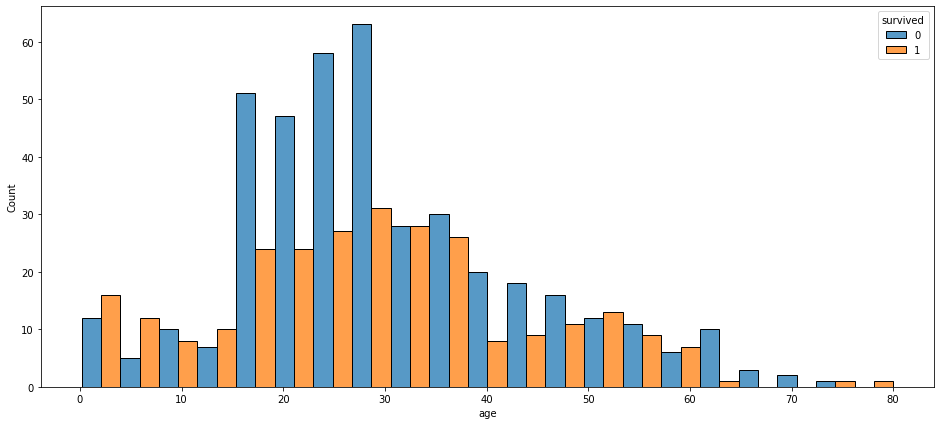

In [9]:
plot.figure(figsize=(16, 7))
sens.histplot(data=titanic_df, x='age', hue='survived',multiple="dodge")
plot.show()

# Plot a graph to visually observe the number of people who survived based on gender

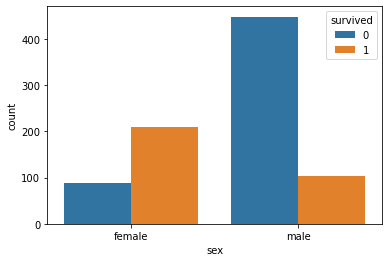

In [10]:
sens.countplot(data=titanic_df, x='sex', hue='survived')

plot.show()

# Filling the missing values

In [11]:
df1.fillna(titanic_df.median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_5640/283725777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(titanic_df.median(), inplace=True)


In [12]:
df1

,passenger_id,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1216,3,28.0,0,0,7.7333,1,1,0,0,1,0
1,699,3,38.0,0,0,8.6625,0,0,1,0,0,1
2,1267,3,30.0,1,1,24.1500,0,1,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,1,0,0,0,1
4,576,2,40.0,0,0,13.0000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,50.0000,0,0,1,0,0,1
846,174,1,58.0,0,0,29.7000,0,0,1,1,0,0
847,467,2,24.0,1,0,26.0000,1,1,0,0,0,1
848,1112,3,3.0,1,1,13.7750,0,1,0,0,0,1


# Separating the outcome we are trying to predict from the dataset

In [13]:
X = df1.drop(['survived'], axis=1)
y = df1[['survived']]

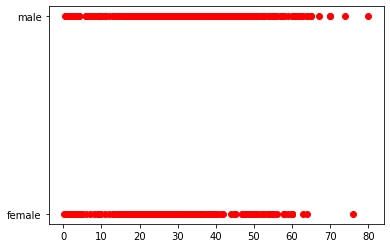

In [14]:
plot.scatter(titanic_df['age'],titanic_df['sex'],color="red")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

# Choosing a classification model. Fit the training data in the model. Then make predictions with the test data and check its accuracy score.

In [16]:
y_train

,survived
273,0
62,0
726,1
537,0
344,1
...,...
73,0
400,0
118,0
701,0


In [17]:
X_test

,passenger_id,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
510,936,3,26.0,1,1,22.0250,1,0,0,0,1
352,701,3,17.0,0,0,8.6625,0,1,0,0,1
580,207,1,33.0,1,0,90.0000,1,0,0,1,0
540,982,3,28.0,0,0,7.8958,0,1,0,0,1
477,593,2,33.0,1,2,27.7500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
463,265,1,28.0,0,0,35.5000,0,1,0,0,1
845,158,1,55.0,0,0,50.0000,0,1,0,0,1
334,231,1,52.0,0,0,30.5000,0,1,0,0,1
281,1100,3,29.0,0,4,21.0750,1,0,0,0,1


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()

In [20]:
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()